# Brain Tumor Classifier

## Import modules

In [1]:
from model.model_v1 import *
from utils.dataset_loader import *
from utils.loss_tracker import *
from utils.plot_utils import *

from torchvision.transforms import v2
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint

## Setup

In [2]:
# Dataset dir path.
DATASET_DIR = "./data"

# Define input the image size (network input).
IMAGE_SIZE = 224

EPOCHS = 35
FINE_TUNE_EPOCHS = 35

# Define train set and test set transformations.
train_transform = v2.Compose([
    v2.Resize((IMAGE_SIZE, IMAGE_SIZE), antialias=True),                    
    v2.RandomHorizontalFlip(p=0.3),                           
    v2.RandomRotation(degrees=360),                             
    #v2.RandomZoomOut(p=0.1, side_range=(1.0, 2.0), fill=0),
    v2.ToTensor(), 
    v2.ToDtype(torch.float32, scale=True)
])

test_transform = v2.Compose([
    v2.Resize((IMAGE_SIZE, IMAGE_SIZE), antialias=True),                    
    v2.ToTensor(), 
    v2.ToDtype(torch.float32, scale=True)
])

# Define the datamodule.
brisc_dm = BRISCDataModule(
    data_dir=DATASET_DIR,
    batch_size=128,
    train_transform=train_transform,
    test_transform=test_transform,
    num_workers=9
)

/usr/lib/python3.13/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


## Plot dataset information

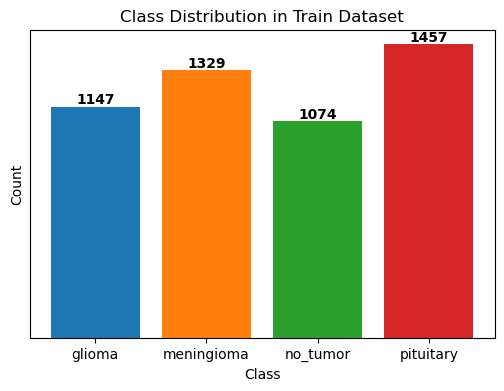

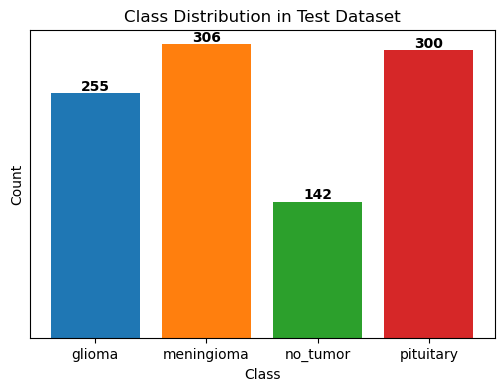

In [3]:
plot_distribution(DATASET_DIR, "Train")
plot_distribution(DATASET_DIR, "Test")

['./data/train/glioma/brisc2025_train_00702_gl_co_t1.jpg', './data/train/meningioma/brisc2025_train_01662_me_co_t1.jpg', './data/train/no_tumor/brisc2025_train_02603_no_ax_t1.jpg', './data/train/pituitary/brisc2025_train_03922_pi_ax_t1.jpg']


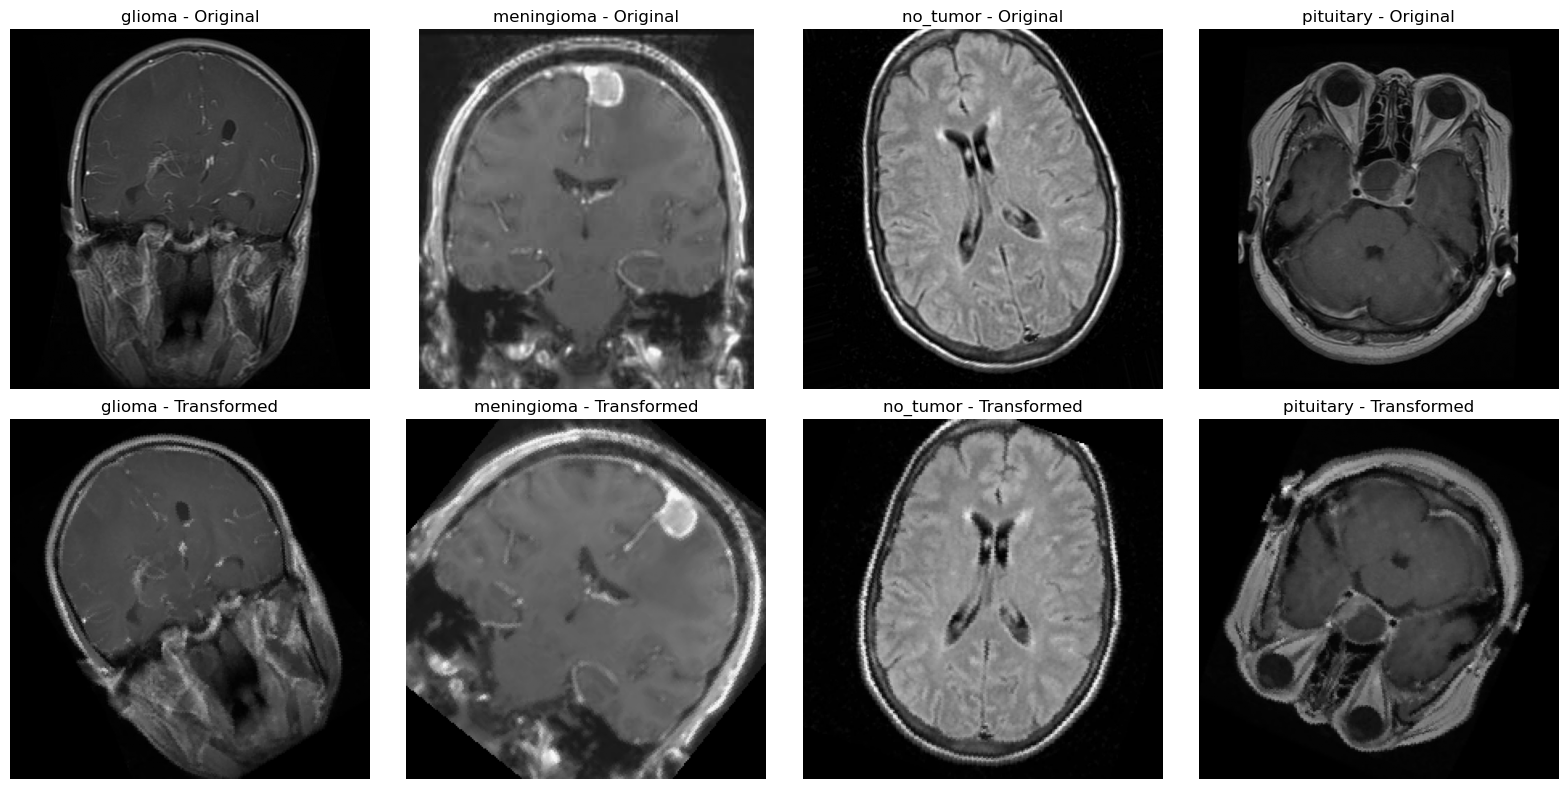

In [4]:
plot_samples(DATASET_DIR, transform=train_transform)

## Define the model

In [5]:
model = ResNetFineTuner(num_classes=4, lr=1e-4, freeze_backbone=True)
print(model)

ResNetFineTuner(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

/usr/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Train model

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070 SUPER') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
2.1 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.714    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Epoch,train_loss,train_acc,val_loss,val_acc
0,-1,-1,1.383818,0.324219


/usr/lib/python3.13/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch,train_loss,train_acc,val_loss,val_acc
0,-1,-1,1.375876,0.322677


Epoch 0, global step 32: 'val_loss' reached 1.37588 (best 1.37588), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=00-val_loss=1.38.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
1,1.303472,0.526316,1.287739,0.398601


Epoch 1, global step 64: 'val_loss' reached 1.28774 (best 1.28774), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=01-val_loss=1.29.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
2,1.193958,0.500000,1.193980,0.493506


Epoch 2, global step 96: 'val_loss' reached 1.19398 (best 1.19398), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=02-val_loss=1.19.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
3,1.192789,0.605263,1.073231,0.620380


Epoch 3, global step 128: 'val_loss' reached 1.07323 (best 1.07323), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=03-val_loss=1.07.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
4,1.130083,0.578947,1.030609,0.647353


Epoch 4, global step 160: 'val_loss' reached 1.03061 (best 1.03061), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=04-val_loss=1.03.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
5,1.031633,0.657895,0.985502,0.671329


Epoch 5, global step 192: 'val_loss' reached 0.98550 (best 0.98550), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=05-val_loss=0.99.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
6,0.998880,0.657895,0.943308,0.711289


Epoch 6, global step 224: 'val_loss' reached 0.94331 (best 0.94331), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=06-val_loss=0.94.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
7,0.916522,0.763158,0.913606,0.705295


Epoch 7, global step 256: 'val_loss' reached 0.91361 (best 0.91361), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=07-val_loss=0.91.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
8,0.884634,0.684211,0.870273,0.727273


Epoch 8, global step 288: 'val_loss' reached 0.87027 (best 0.87027), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=08-val_loss=0.87.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
9,1.128971,0.605263,0.829446,0.759241


Epoch 9, global step 320: 'val_loss' reached 0.82945 (best 0.82945), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=09-val_loss=0.83.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
10,0.806488,0.736842,0.814245,0.745255


Epoch 10, global step 352: 'val_loss' reached 0.81424 (best 0.81424), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=10-val_loss=0.81.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
11,0.757424,0.842105,0.783131,0.770230


Epoch 11, global step 384: 'val_loss' reached 0.78313 (best 0.78313), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=11-val_loss=0.78.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
12,0.800596,0.763158,0.766656,0.748252


Epoch 12, global step 416: 'val_loss' reached 0.76666 (best 0.76666), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=12-val_loss=0.77.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
13,0.863660,0.684211,0.744518,0.772228


Epoch 13, global step 448: 'val_loss' reached 0.74452 (best 0.74452), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=13-val_loss=0.74.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
14,0.704539,0.842105,0.734670,0.779221


Epoch 14, global step 480: 'val_loss' reached 0.73467 (best 0.73467), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=14-val_loss=0.73.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
15,0.758155,0.789474,0.711269,0.793207


Epoch 15, global step 512: 'val_loss' reached 0.71127 (best 0.71127), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=15-val_loss=0.71.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
16,0.773683,0.789474,0.702552,0.777223


Epoch 16, global step 544: 'val_loss' reached 0.70255 (best 0.70255), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=16-val_loss=0.70.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
17,0.567517,0.894737,0.683620,0.802198


Epoch 17, global step 576: 'val_loss' reached 0.68362 (best 0.68362), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=17-val_loss=0.68.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
18,0.747873,0.789474,0.685957,0.789211


Epoch 18, global step 608: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
19,0.828368,0.763158,0.651776,0.814186


Epoch 19, global step 640: 'val_loss' reached 0.65178 (best 0.65178), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=19-val_loss=0.65.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
20,0.838623,0.657895,0.652956,0.792208


Epoch 20, global step 672: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
21,0.641859,0.789474,0.642526,0.790210


Epoch 21, global step 704: 'val_loss' reached 0.64253 (best 0.64253), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=21-val_loss=0.64.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
22,0.779557,0.710526,0.632886,0.791209


Epoch 22, global step 736: 'val_loss' reached 0.63289 (best 0.63289), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=22-val_loss=0.63.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
23,0.771352,0.657895,0.628389,0.811189


Epoch 23, global step 768: 'val_loss' reached 0.62839 (best 0.62839), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=23-val_loss=0.63.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
24,0.593082,0.842105,0.616352,0.797203


Epoch 24, global step 800: 'val_loss' reached 0.61635 (best 0.61635), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=24-val_loss=0.62.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
25,0.750001,0.710526,0.613591,0.799201


Epoch 25, global step 832: 'val_loss' reached 0.61359 (best 0.61359), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=25-val_loss=0.61.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
26,0.535066,0.842105,0.596577,0.810190


Epoch 26, global step 864: 'val_loss' reached 0.59658 (best 0.59658), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=26-val_loss=0.60.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
27,0.832437,0.710526,0.595066,0.806194


Epoch 27, global step 896: 'val_loss' reached 0.59507 (best 0.59507), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=27-val_loss=0.60.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
28,0.565867,0.815789,0.585210,0.797203


Epoch 28, global step 928: 'val_loss' reached 0.58521 (best 0.58521), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=28-val_loss=0.59.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
29,0.585819,0.868421,0.591478,0.819181


Epoch 29, global step 960: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
30,0.601757,0.763158,0.574301,0.801199


Epoch 30, global step 992: 'val_loss' reached 0.57430 (best 0.57430), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=30-val_loss=0.57.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
31,0.535251,0.815789,0.576628,0.822178


Epoch 31, global step 1024: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
32,0.519590,0.894737,0.565622,0.818182


Epoch 32, global step 1056: 'val_loss' reached 0.56562 (best 0.56562), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=32-val_loss=0.57.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
33,0.491452,0.868421,0.545887,0.826174


Epoch 33, global step 1088: 'val_loss' reached 0.54589 (best 0.54589), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=33-val_loss=0.55.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
34,0.605784,0.842105,0.543511,0.829171


Epoch 34, global step 1120: 'val_loss' reached 0.54351 (best 0.54351), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=34-val_loss=0.54.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=35` reached.


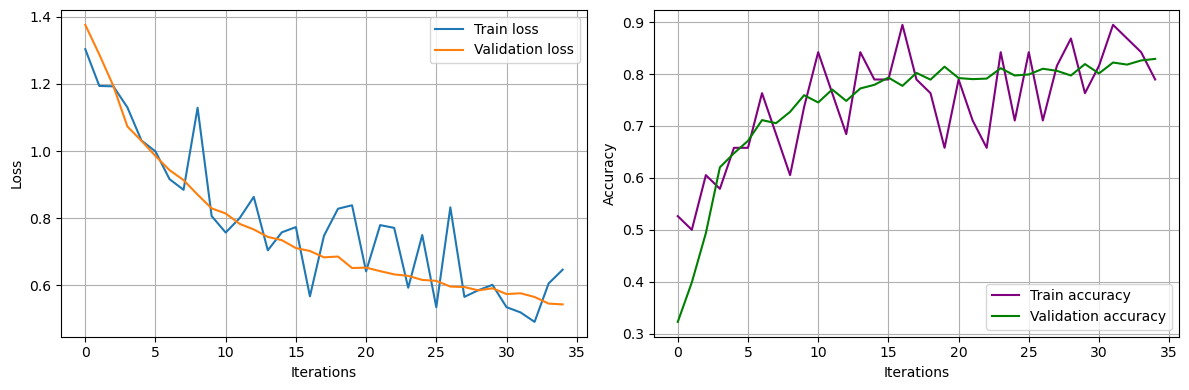

In [6]:
# Define the loss tracker callback.
loss_tracker = LossTracker()

# Define the early stopping callback.
early_stopping = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=5
)

# Define the checkpoint callback.
# (Used to save the model with the lowest
# validation loss).
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    mode="min",
    save_top_k=1,
    filename="best-checkpoint-{epoch:02d}-{val_loss:.2f}",
    verbose=True
)

# Define the trainer.
trainer = L.Trainer(
    accelerator="auto",
    devices=1,
    max_epochs=EPOCHS,
    callbacks=[loss_tracker, early_stopping, checkpoint_callback],
    enable_progress_bar=False,
)

# Train model.
trainer.fit(model, brisc_dm)
# Plot losses.
loss_tracker.plot()

## Fine tuning the model

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/lib/python3.13/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.714    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Epoch,train_loss,train_acc,val_loss,val_acc
0,-1,-1,0.490322,0.878906


Epoch,train_loss,train_acc,val_loss,val_acc
0,-1,-1,0.323012,0.882118


Epoch 0, global step 32: 'val_loss' reached 0.32301 (best 0.32301), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=00-val_loss=0.32.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
1,0.260071,0.894737,0.163461,0.936064


Epoch 1, global step 64: 'val_loss' reached 0.16346 (best 0.16346), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=01-val_loss=0.16.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
2,0.061681,0.973684,0.151382,0.945055


Epoch 2, global step 96: 'val_loss' reached 0.15138 (best 0.15138), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=02-val_loss=0.15.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
3,0.027086,0.973684,0.099853,0.961039


Epoch 3, global step 128: 'val_loss' reached 0.09985 (best 0.09985), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=03-val_loss=0.10.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
4,0.114350,0.947368,0.065617,0.974026


Epoch 4, global step 160: 'val_loss' reached 0.06562 (best 0.06562), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=04-val_loss=0.07.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
5,0.043466,1.000000,0.063281,0.976024


Epoch 5, global step 192: 'val_loss' reached 0.06328 (best 0.06328), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=05-val_loss=0.06.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
6,0.016933,1.000000,0.117689,0.961039


Epoch 6, global step 224: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
7,0.033322,1.000000,0.058075,0.976024


Epoch 7, global step 256: 'val_loss' reached 0.05807 (best 0.05807), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=07-val_loss=0.06.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
8,0.028097,1.000000,0.105858,0.962038


Epoch 8, global step 288: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
9,0.046199,0.973684,0.077104,0.973027


Epoch 9, global step 320: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
10,0.065565,0.973684,0.055964,0.979021


Epoch 10, global step 352: 'val_loss' reached 0.05596 (best 0.05596), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=10-val_loss=0.06.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
11,0.023300,1.000000,0.044102,0.989011


Epoch 11, global step 384: 'val_loss' reached 0.04410 (best 0.04410), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_65/checkpoints/best-checkpoint-epoch=11-val_loss=0.04.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
12,0.028854,0.973684,0.120763,0.966034


Epoch 12, global step 416: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
13,0.011303,1.000000,0.054191,0.981019


Epoch 13, global step 448: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
14,0.046853,0.973684,0.052960,0.984016


Epoch 14, global step 480: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
15,0.003696,1.000000,0.053505,0.986014


Epoch 15, global step 512: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
16,0.007960,1.000000,0.060174,0.978022


Epoch 16, global step 544: 'val_loss' was not in top 1


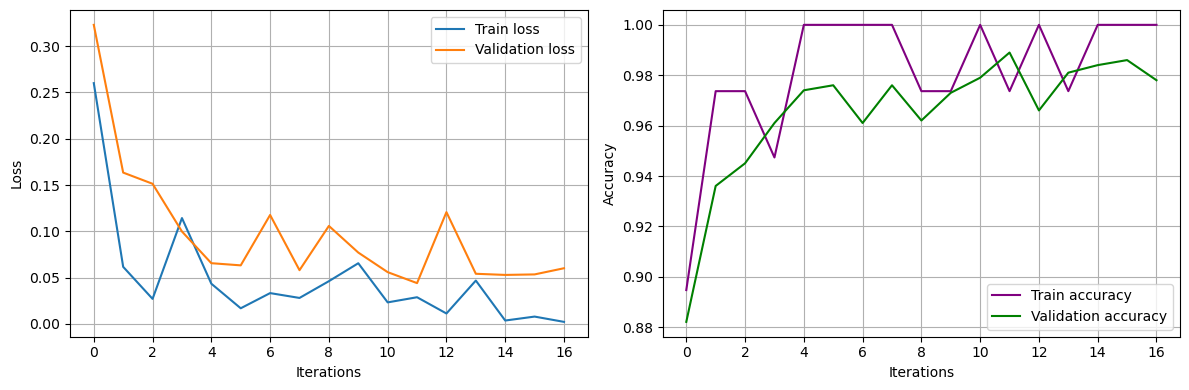

In [7]:
# Load best model.
model = ResNetFineTuner.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

# Unfreeze backbone.
for param in model.parameters():
    param.requires_grad = True

# Reset plots.
loss_tracker.train_loss = []
loss_tracker.train_acc = []
loss_tracker.val_loss = []
loss_tracker.val_acc = []

# Re-define the trainer.
trainer = L.Trainer(
    accelerator="auto",
    devices=1,
    max_epochs=FINE_TUNE_EPOCHS,
    callbacks=[loss_tracker, early_stopping, checkpoint_callback],
    enable_progress_bar=False
)

# Re-start training.
trainer.fit(model, brisc_dm)
# Plot losses.
loss_tracker.plot()

In [8]:
# Load the best model (after fine tuning).
model = ResNetFineTuner.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

# Test model.
trainer.test(model, brisc_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9720837473869324     │
│         test_loss         │    0.08176582306623459    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.08176582306623459, 'test_acc': 0.9720837473869324}]

## Plot performances

Classification Report:

              precision    recall  f1-score   support

      glioma       1.00      0.93      0.97       255
  meningioma       0.94      0.98      0.96       306
    no_tumor       0.97      1.00      0.99       142
   pituitary       0.98      0.98      0.98       300

    accuracy                           0.97      1003
   macro avg       0.97      0.97      0.97      1003
weighted avg       0.97      0.97      0.97      1003



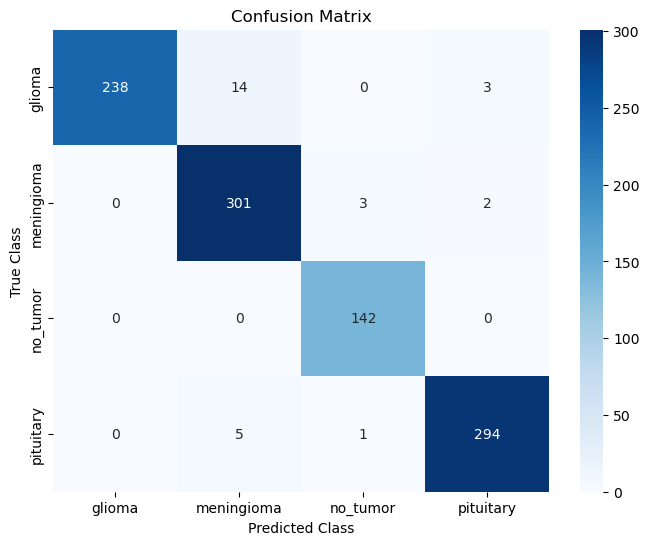

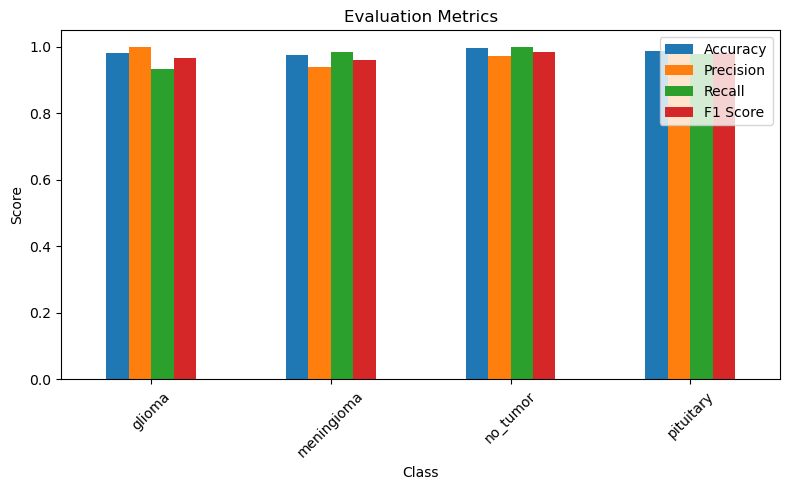

In [9]:
# Plot confusion matrix.
cm = plot_confusion_matrix(brisc_dm, model)

# Plot various statistics of the results.
plot_statistics(cm)